In [1]:
from Functions import *

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
import scipy
from scipy.linalg import pinv
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold, train_test_split, validation_curve, GridSearchCV, learning_curve
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score, silhouette_samples, mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import warnings
import time

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/heart_disease_data.csv')
target_col = 'HeartDisease'
X = scale(df.drop(target_col, axis=1))
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
kf = KFold(5)

# k-Means

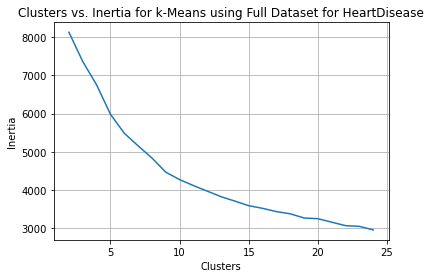

In [5]:
s_scores = plot_inertia(X, 'Full Dataset', target_col, split=True)

> **intertia**: Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

>A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases.

>To find the optimal K for a dataset, use the Elbow method; find the point where the decrease in inertia begins to slow

[source](https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet)

In [6]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,IsMale
0,40,True,289,False,172,False,0.0,1,False,False,True,False,False,False,True,False,True
1,49,True,180,False,156,False,1.0,0,True,False,False,True,False,False,True,False,False
2,37,True,283,False,98,False,0.0,1,False,False,True,False,False,False,False,True,True
3,48,True,214,False,108,True,1.5,0,True,True,False,False,False,False,True,False,False
4,54,True,195,False,122,False,0.0,1,False,False,False,True,False,False,True,False,True


### Plotting Silhouette Scores

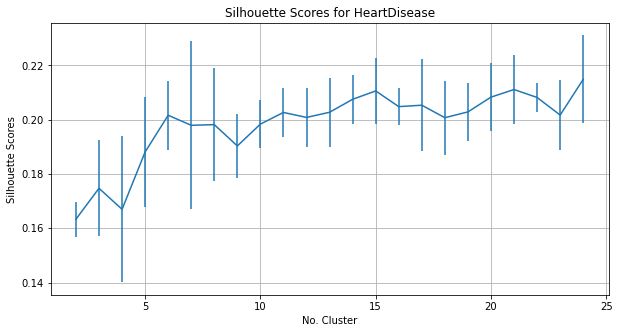

In [8]:
s_scores_df = pd.DataFrame(s_scores)
fig, ax = plt.subplots(figsize=(10,5))
s_avgs = s_scores_df.groupby('cluster').mean()
ax.errorbar(s_avgs.index, s_avgs['silhouette score'], yerr=s_scores_df.groupby('cluster').std()['silhouette score'])
ax.set_title(f'Silhouette Scores for {target_col}')
ax.set_ylabel('Silhouette Scores')
ax.set_xlabel('No. Cluster')
ax.grid();

> **silhouette score**: The value of the silhouette *coefﬁcient* is between [-1, 1]. A score of 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters.

Inertia          :  7093.274406218741
Silhouette score :  0.2215183375013248
AMI score        :  0.14629537379299015
Cluster 0:
	True  : 74.0%
	False : 26.0%
Cluster 1:
	True  : 28.0%
	False : 72.0%
Cluster 2:
	True  : 79.0%
	False : 21.0%
Cluster 3:
	True  : 80.0%
	False : 20.0%
Cluster 4:
	True  : 10.0%
	False : 90.0%
Cluster 5:
	True  : 45.0%
	False : 55.0%


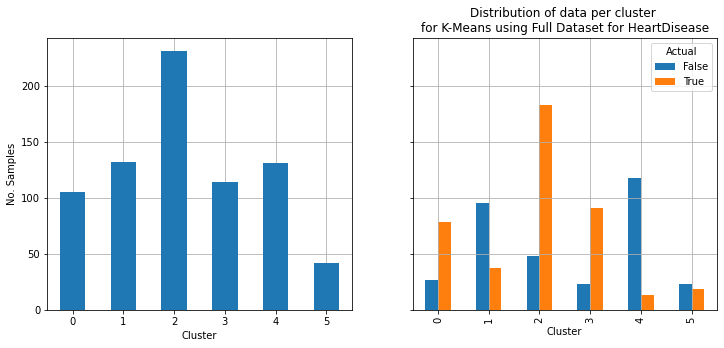

In [9]:
kmeans_cluster = plot_kmeans_cluster_dist(6, X, y, 'Full Dataset', target_col);
get_cluster_breakdown(kmeans_cluster.labels_, y)

Adjusted Mutual Information (AMI) is an adjustment of the Mutual Information (MI) score to account for chance. It accounts for the fact that the MI is generally higher for two clusterings with a larger number of clusters, regardless of whether there is actually more information shared. For two clusterings  and , the AMI is given as:

$AMI(U, V) = [MI(U, V) - E(MI(U, V))] / [avg(H(U), H(V)) - E(MI(U, V))]$
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

This metric is furthermore symmetric: switching  (label_true) with  (labels_pred) will return the same score value. This can be useful to measure the agreement of two independent label assignments strategies on the same dataset when the real ground truth is not known.
[sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html)

# GMM

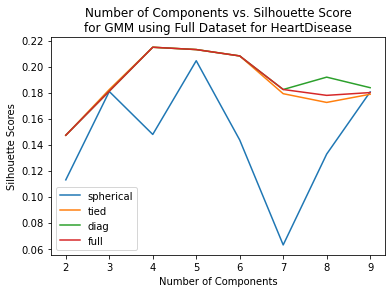

In [10]:
min_comps, max_comps = 2, 10
best_gmm, bic = run_gmm(X, n_comps=range(min_comps,max_comps))
plot_bic(bic, 'GMM', data_set='Full Dataset', target_col=target_col, n_comps=range(min_comps,max_comps))

Silhouette score :  0.21481766573055625
AMI score        :  0.15624027159074425


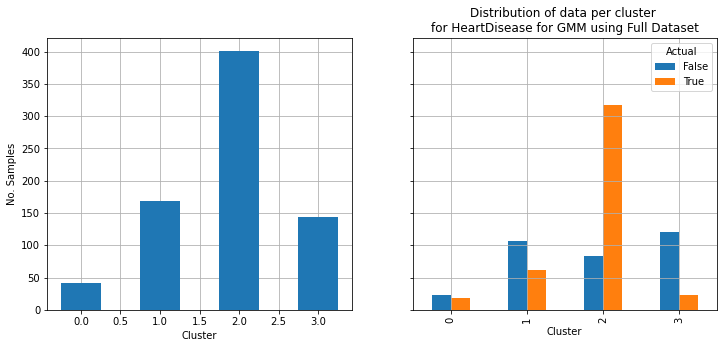

In [14]:
plot_cluster_dist(best_gmm, X, y, 'GMM', 'Full Dataset', target_col)

# PCA

In [15]:
pca = PCA(random_state=0)
pca.fit(X);

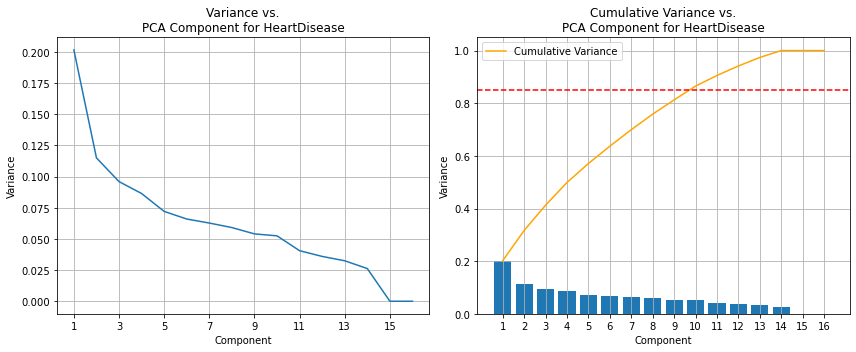

In [17]:
plot_pca_variance(pca, target_col)

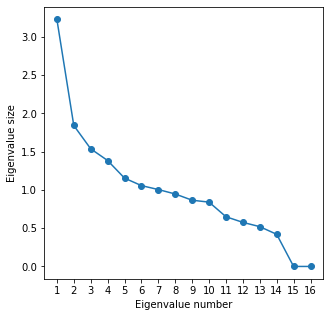

In [18]:
plt.figure(figsize=(5, 5))
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.xticks(range(len(pca.explained_variance_)), range(1, len(pca.explained_variance_)+1));

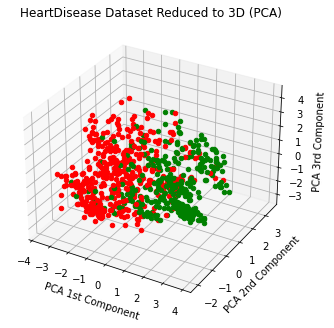

In [19]:
X_PCA = PCA(n_components = .85).fit_transform(X)
X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_PCA, y, test_size=0.3, random_state=0)
plot_3d(X_PCA, y, target_col=target_col, dataset='PCA')

# ICA

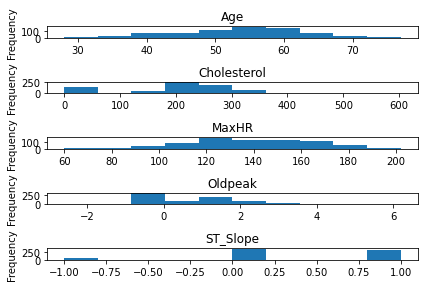

In [20]:
fig, ax = plt.subplots(5)
i=0
for col in df.columns:
    try:
        df[col].plot.hist(ax=ax[i], title=col)
        i+=1
    except:pass
plt.tight_layout()

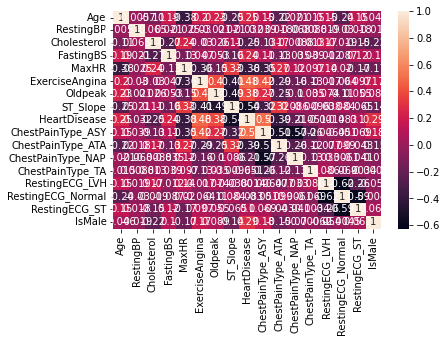

In [21]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True);

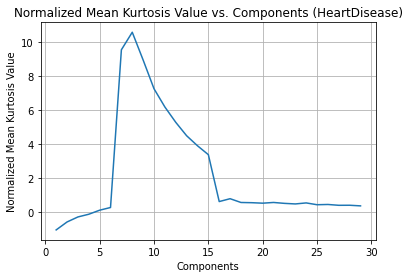

In [22]:
kurtosis_values = plot_kurtosis_values(X, target_col=target_col)

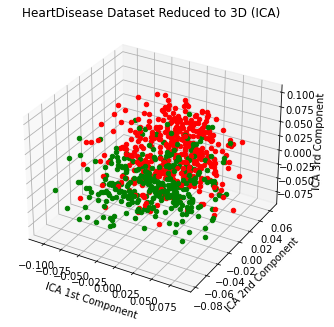

In [23]:
X_ICA = FastICA(n_components = np.argmax(kurtosis_values)+1).fit_transform(X)
X_ICA_train, X_ICA_test, y_ICA_train, y_ICA_test = train_test_split(X_ICA, y, test_size=0.3, random_state=0)
plot_3d(X_ICA, y, target_col=target_col, dataset='ICA')

# Randomized Projections

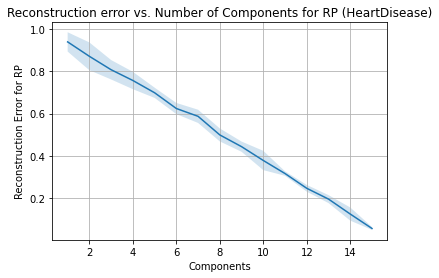

In [24]:
re = []
rv = []
for i in range(1,X.shape[1]):
    mse = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        rp = GaussianRandomProjection(n_components=i)
        X_RP = rp.fit(X_train)
        w = X_RP.components_
        r = ((pinv(w)@w)@(X_train.T)).T
        mse.append(mean_squared_error(X_train,r))
    rv.append(np.std(mse))
    re.append(np.mean(mse))

re = np.array(re)
plt.plot(range(1, X.shape[1]),re)
plt.fill_between(range(1, X.shape[1]),re - rv, re + rv, alpha=0.2)
plt.xlabel('No. Components')
plt.ylabel('Reconstruction Error for RP')
plt.title(f'Reconstruction Error vs. No. Components for RP {target_col}')
plt.grid()

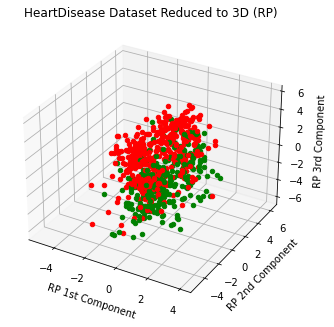

In [26]:
X_RP = GaussianRandomProjection(n_components = 8).fit_transform(X)
X_RP_train, X_RP_test, y_RP_train, y_RP_test = train_test_split(X_RP, y, test_size=0.3, random_state=0)
plot_3d(X_RP, y, target_col=target_col, dataset='RP')

# Feature Selection (Decision Tree)

Features selected: ['Age', 'Cholesterol', 'MaxHR', 'Oldpeak', 'ST_Slope', 'ChestPainType_ASY']


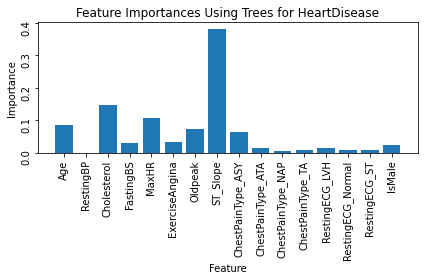

In [27]:
X_df = pd.DataFrame(X, columns=df.drop(target_col, axis=1).columns)

dt = DecisionTreeClassifier()
dt = dt.fit(X_df,y)
model = SelectFromModel(dt, prefit=True)
X_tree = model.transform(X_df)
feats = model.get_feature_names_out(X_df.columns)
print(f'Features selected: {[feat for feat in feats]}')
X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(X_tree, y, test_size=0.3, random_state=0)
plt.bar(df.drop(target_col, axis=1).columns, dt.feature_importances_)
plt.xticks(range(df.shape[1]-1), df.drop(target_col, axis=1).columns)
plt.tick_params(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title(f'Feature Importances Using Trees for {target_col}')
plt.tight_layout();

In [28]:
df[['Age', 'Cholesterol', 'MaxHR', 'Oldpeak', 'ST_Slope', 'ChestPainType_ASY']].head()

,Age,Cholesterol,MaxHR,Oldpeak,ST_Slope,ChestPainType_ASY
0,40,289,172,0.0,1,False
1,49,180,156,1.0,0,False
2,37,283,98,0.0,1,False
3,48,214,108,1.5,0,True
4,54,195,122,0.0,1,False


# Clustering with Dimensionality Reduction
## k-Means

Inertia          :  6132.573827623011
Silhouette score :  0.21563489024179217
AMI score        :  0.17980563884797274
Cluster 0:
	True  : 58.0%
	False : 42.0%
Cluster 1:
	True  : 13.0%
	False : 87.0%
Cluster 2:
	True  : 83.0%
	False : 17.0%
Cluster 3:
	True  : 100.0%
	False : 0.0%
Cluster 4:
	True  : 75.0%
	False : 25.0%


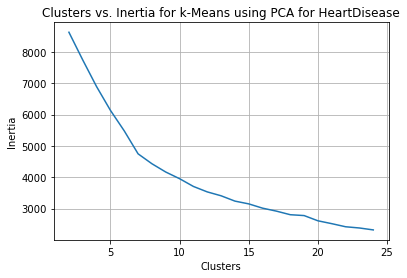

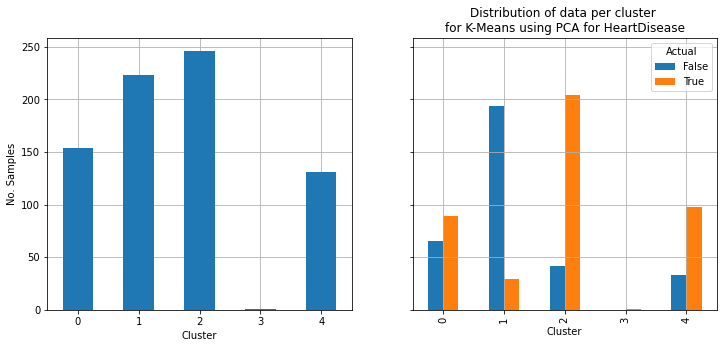

In [29]:
data_set = 'PCA'
plot_inertia(X_PCA, data_set, target_col)

k_means_clustering = plot_kmeans_cluster_dist(5, X_PCA, y, data_set, target_col)

get_cluster_breakdown(k_means_clustering.labels_, y)

Inertia          :  3.2735447512249007
Silhouette score :  0.2842864619803027
AMI score        :  0.11629931854733866
Cluster 0:
	True  : 45.0%
	False : 55.0%
Cluster 1:
	True  : 8.0%
	False : 92.0%
Cluster 2:
	True  : 81.0%
	False : 19.0%
Cluster 3:
	True  : 33.0%
	False : 67.0%
Cluster 4:
	True  : 100.0%
	False : 0.0%
Cluster 5:
	True  : 71.0%
	False : 29.0%
Cluster 6:
	True  : 58.0%
	False : 42.0%


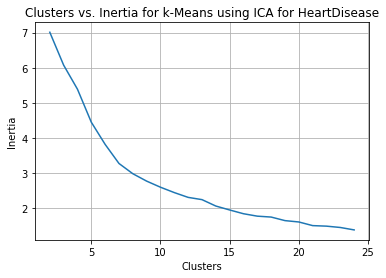

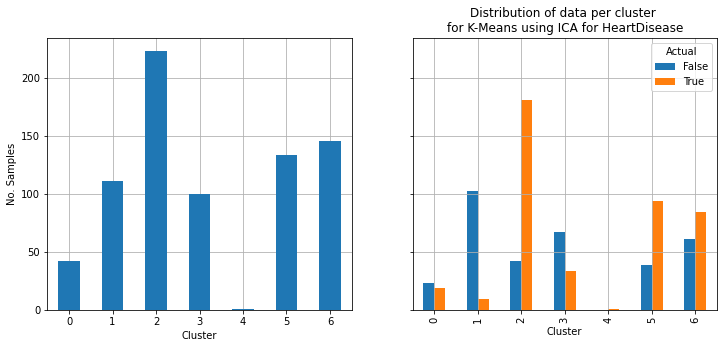

In [30]:
data_set = 'ICA'
plot_inertia(X_ICA, data_set, target_col)

k_means_clustering = plot_kmeans_cluster_dist(7, X_ICA, y, data_set, target_col)

get_cluster_breakdown(k_means_clustering.labels_, y)

Inertia          :  7263.227857478836
Silhouette score :  0.20048210944436104
AMI score        :  0.1744587737433998
Cluster 0:
	True  : 16.0%
	False : 84.0%
Cluster 1:
	True  : 95.0%
	False : 5.0%
Cluster 2:
	True  : 64.0%
	False : 36.0%
Cluster 3:
	True  : 71.0%
	False : 29.0%
Cluster 4:
	True  : 36.0%
	False : 64.0%


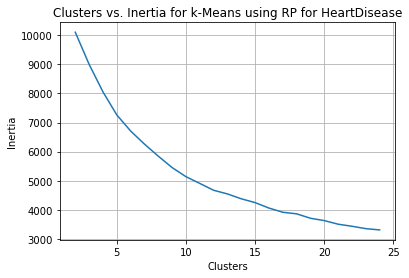

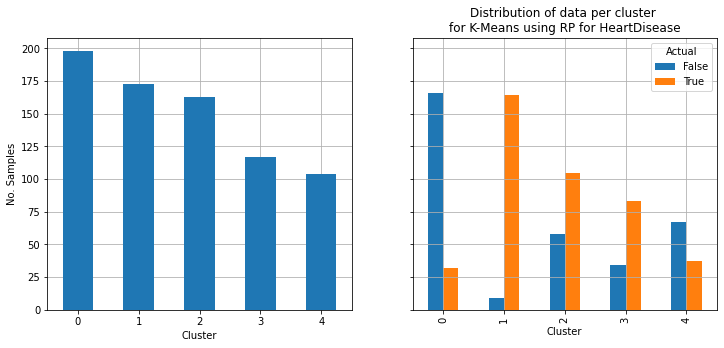

In [31]:
data_set = 'RP'
plot_inertia(X_RP, data_set, target_col)

k_means_clustering = plot_kmeans_cluster_dist(5, X_RP, y, data_set, target_col)

get_cluster_breakdown(k_means_clustering.labels_, y)

Inertia          :  3318.1539368267922
Silhouette score :  0.250334445005028
AMI score        :  0.2849656171406671
Cluster 0:
	True  : 84.0%
	False : 16.0%
Cluster 1:
	True  : 24.0%
	False : 76.0%


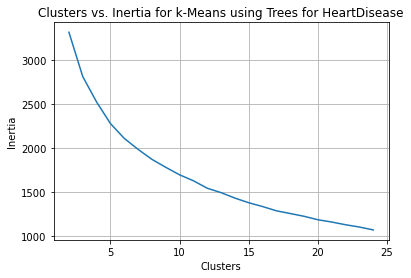

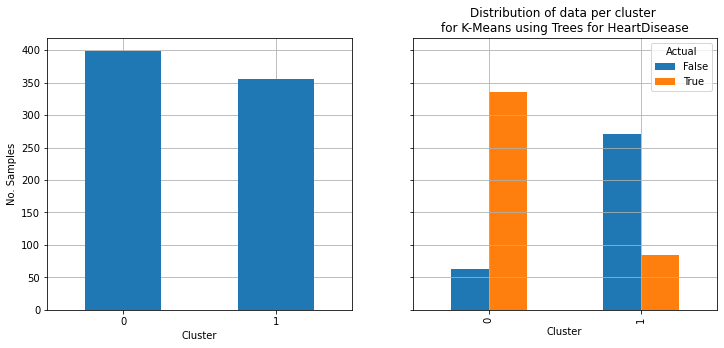

In [32]:
data_set = 'Trees'
plot_inertia(X_tree, data_set, target_col)

k_means_clustering = plot_kmeans_cluster_dist(2, X_tree, y, data_set, target_col)

get_cluster_breakdown(k_means_clustering.labels_, y)

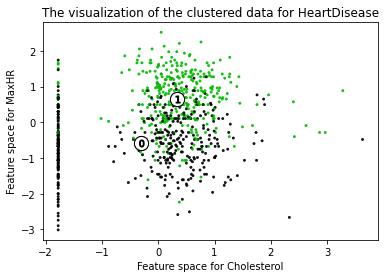

In [33]:
fig, ax = plt.subplots()
plot_clusters(ax, X_tree, k_means_clustering,1, 2, feats, target_col)

## GMM

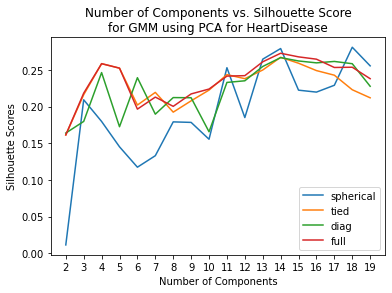

Silhouette score :  0.2808085004999692
AMI score        :  0.1468905186775229


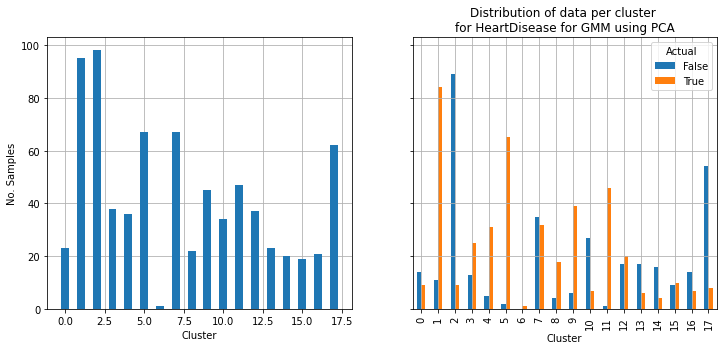

In [34]:
model_name = 'GMM'
data_set = 'PCA'

best_gmm, bic = run_gmm(X_PCA)
plot_bic(bic, model_name, data_set, target_col)
plot_cluster_dist(best_gmm, X_PCA, y, model_name, data_set, target_col)

In [35]:
# dive into the clusters that are distinguished and look at binary information

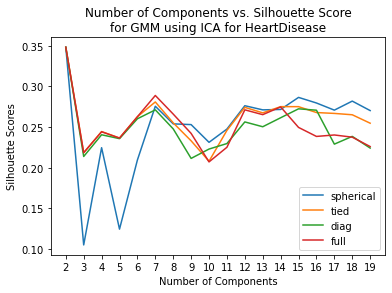

Silhouette score :  0.3482814660013225
AMI score        :  0.0014240237964953373


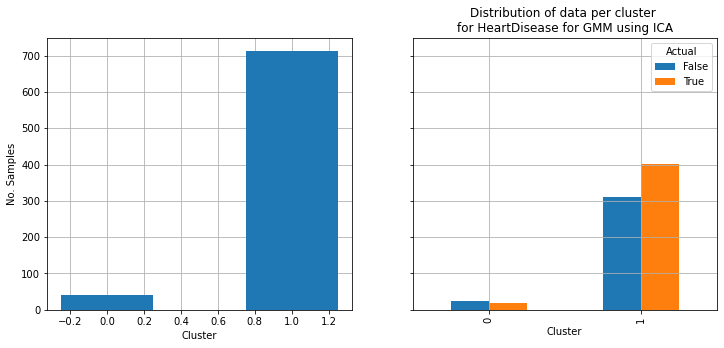

In [36]:
data_set = 'ICA'

best_gmm, bic = run_gmm(X_ICA)
plot_bic(bic, model_name, data_set, target_col)
plot_cluster_dist(best_gmm, X_ICA, y, model_name, data_set, target_col)

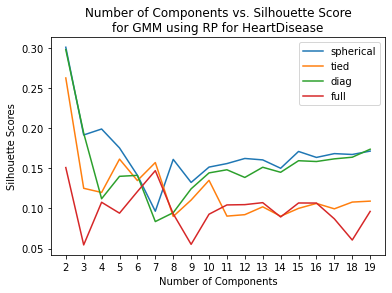

Silhouette score :  0.3006538365884941
AMI score        :  0.25211928270990613


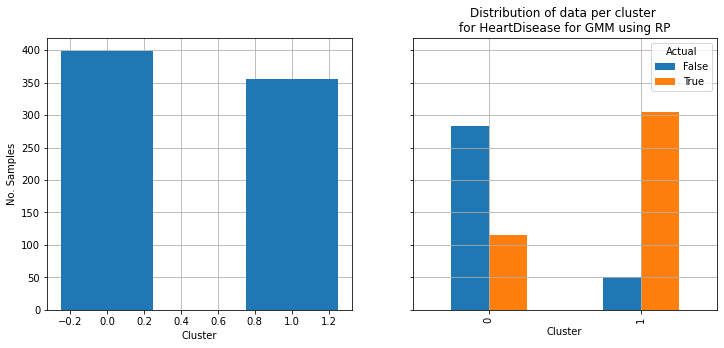

In [37]:
data_set = 'RP'

best_gmm, bic = run_gmm(X_RP)
plot_bic(bic, model_name, data_set, target_col)
plot_cluster_dist(best_gmm, X_RP, y, model_name, data_set, target_col)

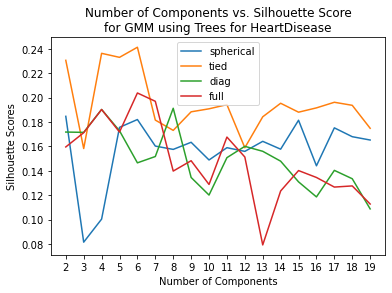

Silhouette score :  0.24130879067462482
AMI score        :  0.2503115120727667


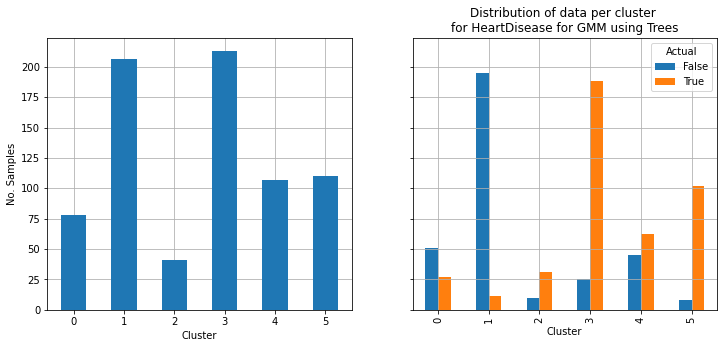

In [38]:
data_set = 'Trees'

best_gmm, bic = run_gmm(X_tree)
plot_bic(bic, model_name, data_set, target_col)
plot_cluster_dist(best_gmm, X_tree, y, model_name, data_set, target_col)

# Training Neural Network

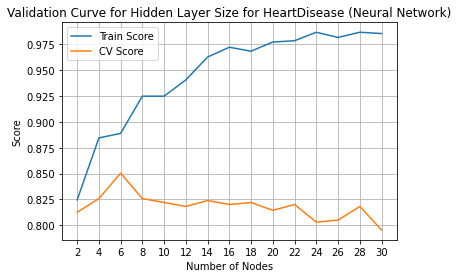

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

nn_classifier = MLPClassifier(random_state=0, max_iter=2000)
train_scores, test_scores = validation_curve(
    nn_classifier, 
    X_train, 
    y_train, 
    param_name="hidden_layer_sizes", 
    param_range=np.arange(2,31,2), 
    cv=4
)

plt.figure()
plt.plot(np.arange(2,31,2), np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.arange(2,31,2), np.mean(test_scores, axis=1), label='CV Score')
plt.legend()
plt.title(f"Validation Curve for Hidden Layer Size for {target_col} (Neural Network)")
plt.xlabel("Number of Nodes")
plt.ylabel("Score")
plt.grid()
plt.xticks(np.arange(2,31,2))
plt.show()

In [43]:
metrics = []
param_grid = {
    'alpha'              : np.logspace(-3,3,7), 
    'hidden_layer_sizes' : np.arange(2,25,2),
    'random_state'       : [0]
}
ls = np.linspace(0.1,1.0,10)

Best params for neural network: {'alpha': 1.0, 'hidden_layer_sizes': 8, 'random_state': 0}
Time to train: 166.22547602653503
Accuracy for best neural network: 0.8105726872246696
Time to infer: 0.0004191398620605469


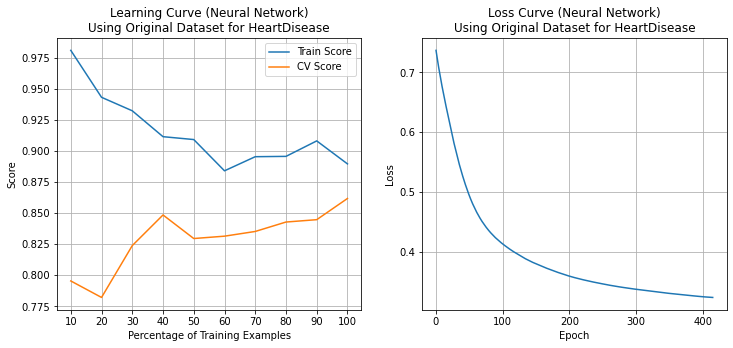

In [44]:
orig_nn_gs, train_time, pred_time, acc = nn_gs(param_grid, X_train, y_train, X_test, y_test, nn_classifier)
start = time.time()
orig_nn = MLPClassifier(
    random_state       = 0, 
    max_iter           = 2000, 
    hidden_layer_sizes = orig_nn_gs.best_params_['hidden_layer_sizes'], 
    alpha              = orig_nn_gs.best_params_['alpha']
)
orig_nn.fit(X_train, y_train)
end = time.time()
metrics.append({
    'Model'      : 'Original',
    'Train Time' : end-start, 
    'Pred Time'  : pred_time, 
    'Accuracy'   : acc
})
nn_orig = plot_learning_loss_curves(ls, orig_nn, X_train, y_train, 'Original Dataset', target_col)

## PCA w NN

Best params for neural network: {'alpha': 0.001, 'hidden_layer_sizes': 10, 'random_state': 0}
Time to train: 91.7858030796051
Accuracy for best neural network: 0.8105726872246696
Time to infer: 0.0007128715515136719


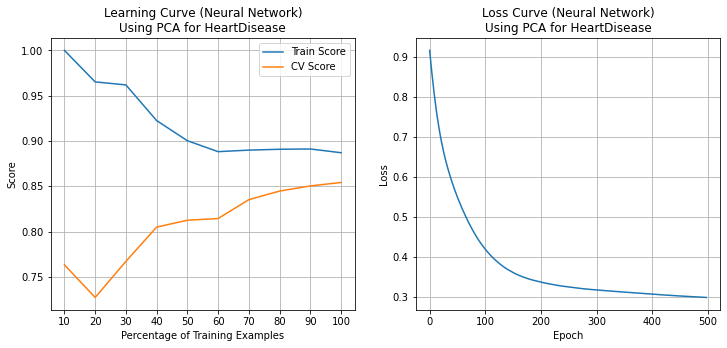

In [45]:
nn_classifier_pca = MLPClassifier(random_state=0, max_iter=2000)
nn_gs_pca, train_time, pred_time, acc = nn_gs(
    param_grid, 
    X_PCA_train,y_PCA_train, 
    X_PCA_test, y_PCA_test, 
    nn_classifier_pca
)
start = time.time()
nn_classifier_pca = MLPClassifier(
    random_state       = 0, 
    max_iter           = 2000, 
    hidden_layer_sizes = nn_gs_pca.best_params_['hidden_layer_sizes'], 
    alpha              = nn_gs_pca.best_params_['alpha']
)
nn_classifier_pca.fit(X_PCA_train, y_PCA_train)
end = time.time()
metrics.append({'Model':'PCA','Train Time':end-start, 'Pred Time':pred_time, 'Accuracy':acc})
nn_pca = plot_learning_loss_curves(ls, nn_classifier_pca, X_PCA_train, y_PCA_train, 'PCA', target_col)

## ICA w NN

Best params for neural network: {'alpha': 0.001, 'hidden_layer_sizes': 18, 'random_state': 0}
Time to train: 123.34095907211304
Accuracy for best neural network: 0.7973568281938326
Time to infer: 0.0004181861877441406


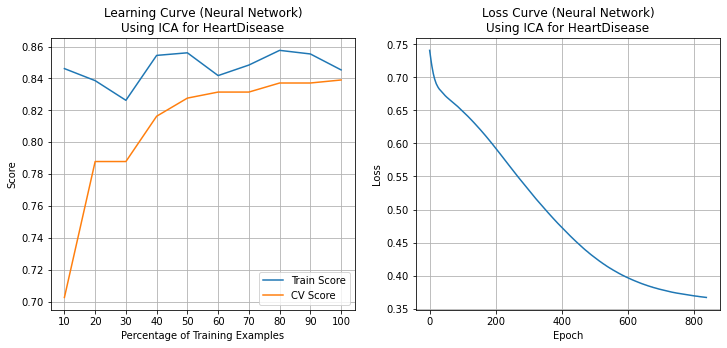

In [46]:
nn_classifier_ica = MLPClassifier(random_state=0, max_iter=2000)
nn_gs_ica, train_time, pred_time, acc = nn_gs(
    param_grid, 
    X_ICA_train, y_ICA_train, 
    X_ICA_test, y_ICA_test, 
    nn_classifier_ica
)
start = time.time()
nn_classifier_ica = MLPClassifier(
    random_state       = 0, 
    max_iter           = 2000, 
    hidden_layer_sizes = nn_gs_ica.best_params_['hidden_layer_sizes'], 
    alpha              = nn_gs_ica.best_params_['alpha']
)
nn_classifier_ica.fit(X_ICA_train, y_ICA_train)
end = time.time()
metrics.append({'Model':'ICA','Train Time':end-start, 'Pred Time':pred_time, 'Accuracy':acc})
nn_ica = plot_learning_loss_curves(ls, nn_classifier_ica, X_ICA_train, y_ICA_train, 'ICA', target_col)

## RP w NN

Best params for neural network: {'alpha': 1.0, 'hidden_layer_sizes': 2, 'random_state': 0}
Time to train: 137.32763385772705
Accuracy for best neural network: 0.8061674008810573
Time to infer: 0.001088857650756836


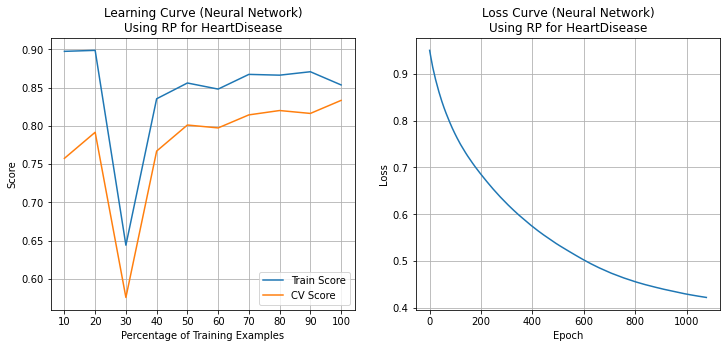

In [47]:
nn_classifier_rp = MLPClassifier(random_state=0, max_iter=2000)
nn_gs_rp, train_time, pred_time, acc = nn_gs(
    param_grid, 
    X_RP_train, y_RP_train, 
    X_RP_test, y_RP_test, 
    nn_classifier_rp
)
start = time.time()
nn_classifier_rp = MLPClassifier(
    random_state       = 0, 
    max_iter           = 2000, 
    hidden_layer_sizes = nn_gs_rp.best_params_['hidden_layer_sizes'], 
    alpha              = nn_gs_rp.best_params_['alpha']
)
nn_classifier_rp.fit(X_RP_train, y_RP_train)
end = time.time()
metrics.append({'Model':'RP','Train Time':end - start, 'Pred Time':pred_time, 'Accuracy':acc})
nn_rp = plot_learning_loss_curves(ls, nn_classifier_rp, X_RP_train, y_RP_train, 'RP', target_col)

## DT w NN

Best params for neural network: {'alpha': 0.001, 'hidden_layer_sizes': 16, 'random_state': 0}
Time to train: 100.15046286582947
Accuracy for best neural network: 0.8193832599118943
Time to infer: 0.0009129047393798828


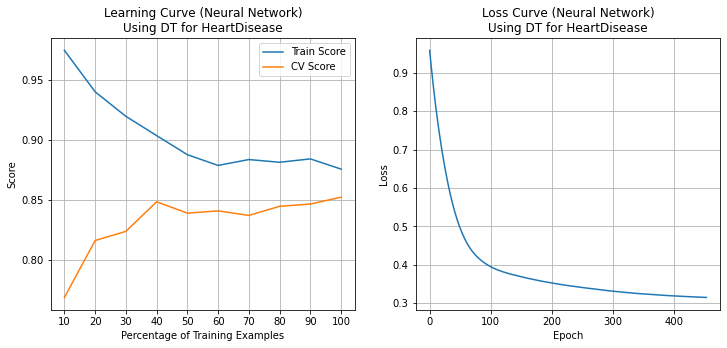

In [48]:
nn_classifier_dt = MLPClassifier(random_state=0, max_iter=2000)
nn_gs_dt, train_time, pred_time, acc = nn_gs(
    param_grid, 
    X_tree_train, y_tree_train, 
    X_tree_test, y_tree_test, 
    nn_classifier_dt
)
start = time.time()
nn_classifier_dt = MLPClassifier(
    random_state       = 0, 
    max_iter           = 2000, 
    hidden_layer_sizes = nn_gs_dt.best_params_['hidden_layer_sizes'], 
    alpha              = nn_gs_dt.best_params_['alpha']
)
nn_classifier_dt.fit(X_tree_train, y_tree_train)
end = time.time()
metrics.append({'Model':'DT','Train Time':end-start, 'Pred Time':pred_time, 'Accuracy':acc})
nn_dt = plot_learning_loss_curves(ls, nn_classifier_dt, X_tree_train, y_tree_train, 'DT', target_col)

## kMeans w NN

Best params for neural network: {'alpha': 10.0, 'hidden_layer_sizes': 14, 'random_state': 0}
Time to train: 167.68474698066711
Accuracy for best neural network: 0.788546255506608
Time to infer: 0.0006558895111083984


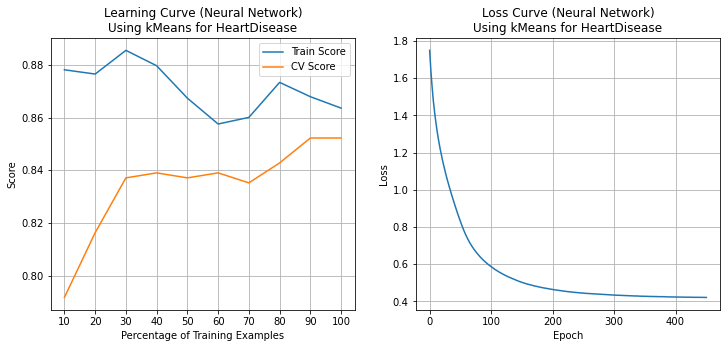

In [49]:
k = 6
km = KMeans(n_clusters=k, random_state=0)
X_km = np.append(X, km.fit_transform(X), 1)
X_km_train, X_km_test, y_km_train, y_km_test = train_test_split(X_km, y, test_size=0.3, random_state=0)

nn_classifier_km = MLPClassifier(random_state=0, max_iter=2000)
nn_gs_km, train_time, pred_time, acc = nn_gs(
    param_grid, 
    X_km_train, y_km_train, 
    X_km_test, y_km_test, 
    nn_classifier_km
)
start = time.time()
nn_classifier_km = MLPClassifier(
    random_state       = 0, 
    max_iter           = 2000, 
    hidden_layer_sizes = nn_gs_km.best_params_['hidden_layer_sizes'], 
    alpha              = nn_gs_km.best_params_['alpha']
)
nn_classifier_km.fit(X_km_train, y_km_train)
end = time.time()
metrics.append({'Model':'kMeans','Train Time':end - start, 'Pred Time':pred_time, 'Accuracy':acc})
nn_km = plot_learning_loss_curves(ls, nn_classifier_km, X_km_train, y_km_train, 'kMeans', target_col)

## EM w NN

Best params for neural network: {'alpha': 1.0, 'hidden_layer_sizes': 6, 'random_state': 0}
Time to train: 156.6583969593048
Accuracy for best neural network: 0.801762114537445
Time to infer: 0.0004439353942871094


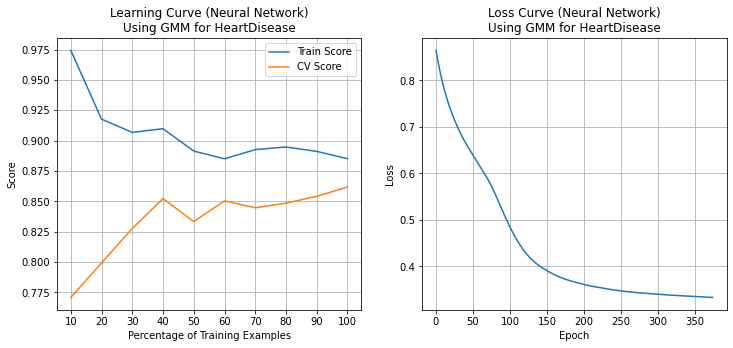

In [50]:
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(X)
X_GMM = np.append(X, gmm.predict_proba(X), 1)
X_GMM_train, X_GMM_test, y_GMM_train, y_GMM_test = train_test_split(X_GMM, y, test_size=0.3, random_state=0)

nn_classifier_gmm = MLPClassifier(random_state=0, max_iter=2000)
nn_gs_gmm, train_time, pred_time, acc = nn_gs(
    param_grid, 
    X_GMM_train, y_GMM_train, 
    X_GMM_test, y_GMM_test, 
    nn_classifier_gmm
)
start = time.time()
nn_classifier_gmm = MLPClassifier(
    random_state       = 0, 
    max_iter           = 2000, 
    hidden_layer_sizes = nn_gs_gmm.best_params_['hidden_layer_sizes'], 
    alpha              = nn_gs_gmm.best_params_['alpha']
)
nn_classifier_gmm.fit(X_GMM_train, y_GMM_train)
end = time.time()
# plotting learning curve 
metrics.append({'Model':'GMM','Train Time':end-start, 'Pred Time':pred_time, 'Accuracy':acc})
nn_gmm = plot_learning_loss_curves(ls, nn_classifier_gmm, X_GMM_train, y_GMM_train, 'GMM', target_col)

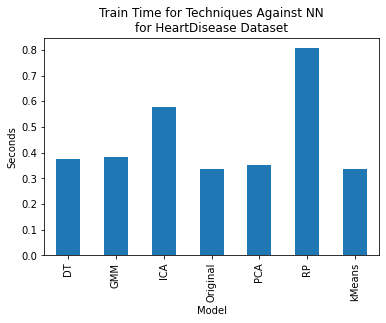

In [51]:
pd.DataFrame(metrics).groupby('Model').sum()['Train Time'].plot.bar(
    title=f'Train Time for Techniques Against NN\nfor {target_col} Dataset',
    ylabel='Seconds'
);

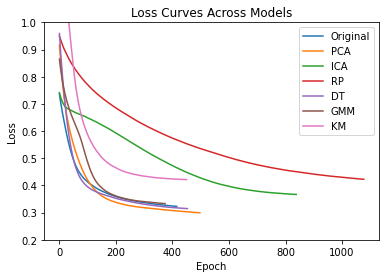

In [52]:
models = {'Original':nn_orig, 'PCA':nn_pca, 'ICA':nn_ica, 'RP':nn_rp, 'DT':nn_dt, 'GMM':nn_gmm, 'KM':nn_km}
for name, model in models.items():
    plt.plot(model.loss_curve_, label=name)
plt.ylim(.2,1)
plt.title('Loss Curves Across Models')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend();